In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

In [41]:
benchmarks = [
    'aes',
    'atax',
    'bicg',
    'bitonicsort',
    'conv2d',
    'fastwalshtransform',
    'fir',
    'fft',
    'floydwarshall',
    'im2col',
    'kmeans',
    'matrixmultiplication',
    'matrixtranspose',
    'nbody',
    'nw',
    'pagerank',
    'relu',
    'simpleconvolution',
    'spmv',
    'stencil2d',
]

In [42]:
result_dir = 'results/2022-05-24-10-11-53/'

In [45]:
import subprocess

def do_grep(filename, pattern):
    try:
        with open(filename, 'r') as f:
            with open(filename + '.tmp', 'w') as out:
                for line in f:
                    if pattern in line:
                        out.write(line)
    except Exception as e:
        print(e)

In [46]:
for b in benchmarks:
    do_grep(result_dir + b + '.stdout', 'wg complete')
    do_grep(result_dir + b + '_projection.stdout', 'wg complete')

[Errno 2] No such file or directory: 'results/2022-05-24-10-11-53/aes.stdout'
[Errno 2] No such file or directory: 'results/2022-05-24-10-11-53/aes_projection.stdout'
[Errno 2] No such file or directory: 'results/2022-05-24-10-11-53/atax.stdout'
[Errno 2] No such file or directory: 'results/2022-05-24-10-11-53/atax_projection.stdout'
[Errno 2] No such file or directory: 'results/2022-05-24-10-11-53/bicg.stdout'
[Errno 2] No such file or directory: 'results/2022-05-24-10-11-53/bicg_projection.stdout'
[Errno 2] No such file or directory: 'results/2022-05-24-10-11-53/bitonicsort.stdout'
[Errno 2] No such file or directory: 'results/2022-05-24-10-11-53/bitonicsort_projection.stdout'
[Errno 2] No such file or directory: 'results/2022-05-24-10-11-53/conv2d.stdout'
[Errno 2] No such file or directory: 'results/2022-05-24-10-11-53/conv2d_projection.stdout'
[Errno 2] No such file or directory: 'results/2022-05-24-10-11-53/fastwalshtransform.stdout'
[Errno 2] No such file or directory: 'results/

In [33]:
aes_origin_data = pd.read_csv(result_dir + 'relu.stdout.tmp', header=None)
aes_origin_data.columns=['type', 'time']
aes_origin_data = aes_origin_data.reset_index()
aes_origin_data

,index,type,time
0,0,wg complete,0.000006
1,1,wg complete,0.000006
2,2,wg complete,0.000006
3,3,wg complete,0.000006
4,4,wg complete,0.000006
...,...,...,...
163835,163835,wg complete,0.000854
163836,163836,wg complete,0.000854
163837,163837,wg complete,0.000854
163838,163838,wg complete,0.000854


In [34]:
aes_origin_data['gap'] = aes_origin_data['time'].diff()
aes_origin_data

,index,type,time,gap
0,0,wg complete,0.000006,NaN
1,1,wg complete,0.000006,5.000000e-09
2,2,wg complete,0.000006,1.300000e-07
3,3,wg complete,0.000006,5.000000e-09
4,4,wg complete,0.000006,4.500000e-08
...,...,...,...,...
163835,163835,wg complete,0.000854,1.000000e-09
163836,163836,wg complete,0.000854,1.000000e-09
163837,163837,wg complete,0.000854,1.000000e-09
163838,163838,wg complete,0.000854,1.000000e-09


In [35]:
aes_projection_data = pd.read_csv(result_dir + 'relu_projection.stdout.tmp', header=None)
aes_projection_data.columns=['type', 'time']
aes_projection_data = aes_projection_data.reset_index()
aes_projection_data

,index,type,time
0,0,wg complete,0.000006
1,1,wg complete,0.000006
2,2,wg complete,0.000006
3,3,wg complete,0.000006
4,4,wg complete,0.000006
...,...,...,...
163834,163834,proj wg complete,0.000108
163835,163835,proj wg complete,0.000108
163836,163836,proj wg complete,0.000108
163837,163837,proj wg complete,0.000108


In [36]:
aes_projection_data['gap'] = aes_projection_data['time'].diff()
aes_projection_data

,index,type,time,gap
0,0,wg complete,0.000006,NaN
1,1,wg complete,0.000006,5.000000e-09
2,2,wg complete,0.000006,1.300000e-07
3,3,wg complete,0.000006,5.000000e-09
4,4,wg complete,0.000006,4.500000e-08
...,...,...,...,...
163834,163834,proj wg complete,0.000108,0.000000e+00
163835,163835,proj wg complete,0.000108,0.000000e+00
163836,163836,proj wg complete,0.000108,1.000000e-10
163837,163837,proj wg complete,0.000108,0.000000e+00


In [37]:
aes_projection_data.to_csv(result_dir + 'relu_projection.csv')

<AxesSubplot:xlabel='index', ylabel='time'>

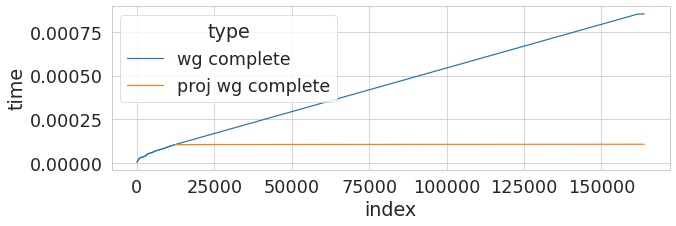

In [39]:
fig, ax = plt.subplots(figsize=(10, 3))

sns.lineplot(data=aes_origin_data, 
    x='index', y='time')

sns.lineplot(data = aes_projection_data,
    x='index', y='time', hue = 'type')

# ax.set_ylim([0, 1e-6])